# Onset determination

<div class="alert alert-block alert-success">
<b>Please refer to the following paper for more information and cite it if you use this tool in your publication:</b><br><br>
Palmroos, C., Gieseler, J., Dresing N., Morosan D. E., Asvestari E., Yli-Laurila A., Price D. J., Valkila S., Vainio R. (2022).
Solar energetic particle time series analysis with Python. <i>Front. Astronomy Space Sci.</i> 9. <a href="https://doi.org/10.3389/fspas.2022.1073578">doi:10.3389/fspas.2022.1073578</a>
</div>

#### First import the necessary library

In [ ]:
from seppy.tools import Event
import seppy.tools.widgets as w
from seppy.util import jupyterhub_data_path
import datetime, os

#### Choose spacecraft, sensor, viewing direction and particle species from the drop-down menu:

In [ ]:
display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)

Dropdown(description='Spacecraft:', options=('PSP', 'SOHO', 'Solar Orbiter', 'STEREO-A', 'STEREO-B', 'Wind'), …

Dropdown(description='Sensor:', options=('isois-epihi', 'isois-epilo'), value='isois-epihi')

Dropdown(description='Viewing:', options=('A', 'B'), value='A')

Dropdown(description='Species:', options=('protons', 'electrons'), value='protons')

#### Set the path to your data folder:

In [ ]:
# Set your local path where you want to save the data files. If run on the project's JupyterHub server, it's set to a common data folder in the base directory. 
data_path = f"{os.getcwd()}{os.sep}data"
data_path = jupyterhub_data_path(data_path)

#### Choose time range for data loading, and create the Event object:

In [ ]:
# Format of date: year, month, day
startdate = datetime.date(2021, 10, 28)
enddate = datetime.date(2021, 10, 29)

# Get event data:
Event_onset = Event(spacecraft=w.spacecraft_drop.value, sensor=w.sensor_drop.value, 
                    data_level='l2', species = w.species_drop.value, viewing=w.view_drop.value,
                    start_date=startdate, end_date=enddate, 
                    data_path=data_path)

#### Print out the energy channel keys and corresponding energy ranges

In [ ]:
Event_onset.print_energies()

soho, erne:

Channel number | Energy range
 0  :  13  - 16  MeV
 1  :  16  - 20  MeV
 2  :  20  - 25  MeV
 3  :  25  - 32  MeV
 4  :  32  - 40  MeV
 5  :  40  - 50  MeV
 6  :  50  - 64  MeV
 7  :  64  - 80  MeV
 8  :  80  - 100 MeV
 9  :  100 - 130 MeV


#### Set the averaging period, background_range, channels to plot and the time range of the plot:

In [ ]:
# Use pandas-compatible resampling period string, e.g. '10min' or '30s'
# Set to None to not resample data
averaging = "1min"

# Set the time range for what is considered the background preceding the event:
# Format of datetime: year, month, day, hour, minute, second
background_range = (datetime.datetime(2021, 10, 28, 10, 0, 0), 
                    datetime.datetime(2021, 10, 28, 12, 0, 0))

# Set the channel(s) to plot (use a list to combine multiple channels):
channels = 3

# Set the time range for the plot:
plot_range = [datetime.datetime(2021, 10, 28, 0),datetime.datetime(2021, 10, 29, 0)]

#### Run the cell to produce a plot

##### >Energy channels< #####
25.0 - 32.0 MeV
#############################

##### >Flux peak< #####
Epoch
2021-10-28 22:54:30    0.312
Freq: T, Name: PH_3, dtype: float32
#######################

##### >Onset time< #####
2021-10-28 17:19:30
########################

##### >Mean of background intensity< #####
0.000103525
##########################################

##### >Std of background intensity< #####
0.000101754114
#########################################

##### >Particle species< #####
protons
##############################



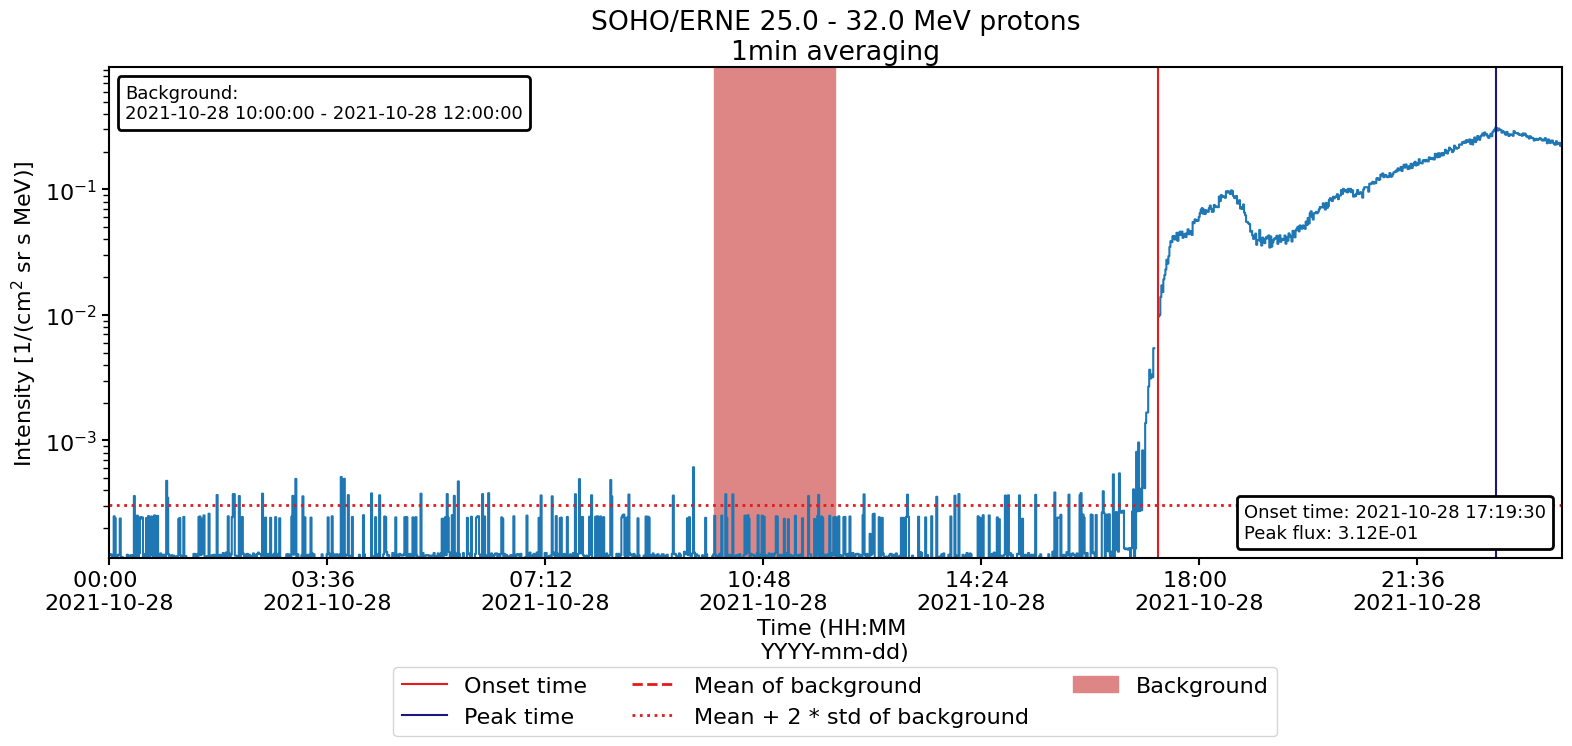

In [ ]:
flux, onset_stats, onset_found, peak_flux, peak_time, fig, bg_mean = Event_onset.find_onset(viewing=w.view_drop.value, background_range=background_range, channels=channels,
                                                                                            resample_period=averaging, yscale='log', cusum_window=30, xlim=plot_range)
onset = onset_stats[-1]
peak_flux = peak_flux.values[0]
output = Event_onset.output

#### output is a dictionary, that contains 'flux_series', 'onset_stats', 'onset_found', 'onset', 'peak_flux', 'peak_time', 'fig' and 'bg_mean'

In [ ]:
print(f"Onset: {output['onset'].round(freq='s')}")
print(f"Peak flux: {output['peak_flux']:.2e}")
print(f"Peak time: {output['peak_time'].round(freq='s')}")
print(f"Bg mean: {output['bg_mean']:.2e}")

Onset: 2021-10-28 15:55:30
Peak flux: 7.98e+00
Peak time: 2021-10-28 22:24:30
Bg mean: 5.10e-03


#### Saving figures

In [ ]:
# Path to save the plots
plot_path = f'{os.getcwd()}'

# Use a pre-generated name for the file:
file_name = f"{plot_path}{os.sep}{w.spacecraft_drop.value.replace(' ', '_')}_{w.sensor_drop.value}_{w.view_drop.value+'_' if w.view_drop.value is not None else ''}{w.species_drop.value}{'_'+averaging if averaging is not None else ''}_{startdate.strftime('%Y%m%d')}.png"

# Or type your own here:
# file_name = ""

In [ ]:
# Check that the name is correct
print(file_name)

/home/chospa/Documents/Github/SPOT/SOHO_EPHIN_electrons_2min_20211009.png


### Saving figures

You can usually save a figure from the Notebook by right-clicking on it while holding down the ⇧ Shift key, then select "Save Image As..." (or similar). Alternatively, run the following cell.

In [ ]:
# Save plot
fig.savefig(file_name, facecolor= 'white', transparent=False)

---
## FAQ / Problems <a class="anchor" id="faq"></a>

- **Saving figures**

You can usually save a figure from the Notebook by right-clicking on it while holding down the ⇧ Shift key, then select "Save Image As..." (or similar).

- **I get some error about missing data, or that the data is broken, or something I don't understand.**

Most times such a problem originates in an incomplete download of the corresponding data file. The easiest approach to solve that problem is to delete the file and run the code again to re-download it. 
To do this, first check if a `path` has been provided. If `path` has *not* been defined (or as `None`), the standard `path` for SunPy downloads should have been used. You can obtain it by running the following code cell:


In [ ]:
import sunpy 
sunpy.config.get('downloads', 'download_dir')

'/home/gieseler/sunpy/data'

Open the corresponding directory in your file browser and look for the corresponding data file. Usually it's easiest to order the files by modification date, so that the latest modified file (which usually should be the culprit) comes first. Then delete the corresponding file(s), and run the code again.